In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,bartlett,mannwhitneyu
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("E:/DS/data sets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in our data

In [9]:
df.shape

(200, 5)

Data consists about 200 customers with there id, gender,age,annual income and spending score

In [11]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

we are having more no of females in our data compared to males in the ratio (6:5)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


we can observe that the age ranges from 18 to 70 with mean age as 39

Annual income ranges from 15 to 137 with average income as 60.5

spending score from 1 to 100 with average score as 50

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


we are having all attributes as object except gender, gender is an categorical variable

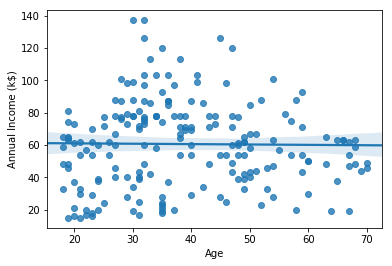

In [58]:
sns.regplot(df["Age"],df["Annual Income (k$)"])

we can observe that all age groups are having same annual income

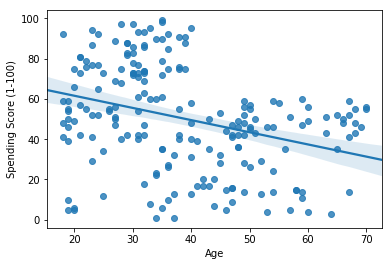

In [59]:
sns.regplot(df["Age"],df["Spending Score (1-100)"])

we can observe that with decrease in age there is a slight decrease in spending score which is quite natural

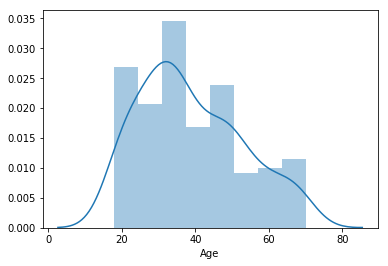

In [20]:
sns.distplot(df["Age"])

let check age follows normal distribution or not by using shapiro with our hypothesis as follows

H0 :- age = normal

H1:- age =! normal

In [21]:
shapiro(df["Age"])

(0.9516186714172363, 2.711100023589097e-06)

since pvalue is 0.0000027 which is less than 0.05 we reject null hypothesis which means age does not follow normal distribution

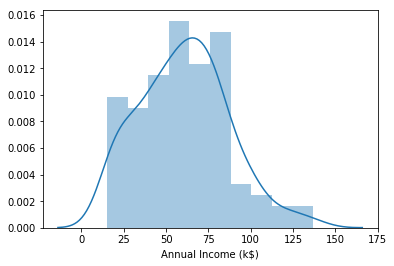

In [24]:
sns.distplot(df["Annual Income (k$)"])

let check annual income follows normal distribution or not by using shapiro with our hypothesis as follows

H0 :- annual income = normal

H1:- annual income  =! normal

In [25]:
shapiro(df["Annual Income (k$)"])

(0.9783905148506165, 0.0035373352002352476)

p value is 0.35% which is less than 5% , so we reject null hypothesis stating our annual income is not normal

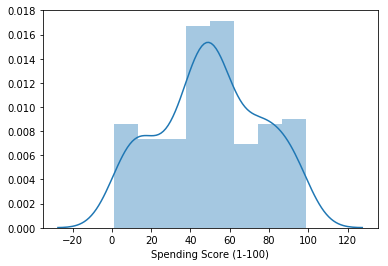

In [26]:
sns.distplot(df["Spending Score (1-100)"])

let check spending score income follows normal distribution or not by using shapiro with our hypothesis as follows

H0 :- spending score = normal

H1:- spending score  =! normal

In [28]:
shapiro(df["Spending Score (1-100)"])

(0.9694609642028809, 0.0002423154073767364)

our pvalue is 0.0002 which is less than 0.05, so we reject our null hypothesis saying that spending score is not normal

so we can conclude that any one of our attritube isn't normall distributed

# we want to know about annual income of male and female 

H0:- average annual income male = average annual income female

Ha:- average annual income male != average annual income female

In [49]:
g1 = df[df["Gender"]=="Male"]["Annual Income (k$)"]
g2 = df[df["Gender"]=="Female"]["Annual Income (k$)"]

In [50]:
g1.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [51]:
g2.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual Income (k$), dtype: float64

In [52]:
shapiro(g1)

(0.9705666303634644, 0.04253118485212326)

In [53]:
shapiro(g2)

(0.9762638211250305, 0.04328589141368866)

Both does not follow normal distribution, so check variances using bartlett

In [54]:
bartlett(g1,g2)

BartlettResult(statistic=0.055055817909113076, pvalue=0.8144883453504312)

since pvalue is 81.4% which is very high and greater than 5% tells us that the variance of male and female group is same

In [55]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=4596.0, pvalue=0.20720026844634853)

since p value is 20.7% which is greater than 5% we fail to reject null hypothesis, that is average income of male is equal to average income of female

# we want to know about average spending score of male and female

H0:- average spending score of male = average spending score of female
    
Ha:- average spending score of male != average spending score of female

In [43]:
g3 = df[df["Gender"]=="Male"]["Spending Score (1-100)"]
g4 = df[df["Gender"]=="Female"]["Spending Score (1-100)"]

In [46]:
shapiro(g3)

(0.9521820545196533, 0.0026273364201188087)

In [47]:
shapiro(g4)

(0.9743800163269043, 0.02976641058921814)

Both groups does not follow normal distribution, lets check their variances using bartlett

In [48]:
bartlett(g3,g4)

BartlettResult(statistic=2.0766533580231967, pvalue=0.1495677881965045)

since pvalue is 14.9% which is very high and greater than 5% tells us that the variance of male and female group is same

In [56]:
mannwhitneyu(g3,g4)

MannwhitneyuResult(statistic=4697.5, pvalue=0.2856397094080328)

since p value is 28.5% which is greater than 5% we fail to reject null hypothesis, that is average spending score of male is equal to average spending score of female

# k means clustering

In [129]:
cluster_errors = []
x1 = df.drop(["Gender","CustomerID"],axis=1)
for num_clusters in range(1,10):
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(x1)
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":range(1,10), "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,308862.775000
1,2,212889.637852
2,3,143362.068645
3,4,104384.088298
4,5,75496.985073
5,6,58318.322269
6,7,51543.276473
7,8,45296.495355
8,9,40643.766663


# Elbow plot

Text(0, 0.5, 'Error')

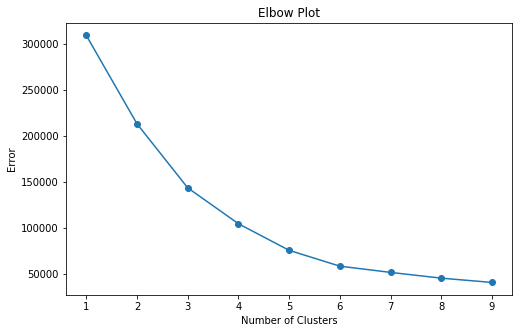

In [131]:
plt.figure(figsize=(8,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

# silhoutte analysis

For n_clusters = 2 The average silhouette_score is : 0.29311653710210456


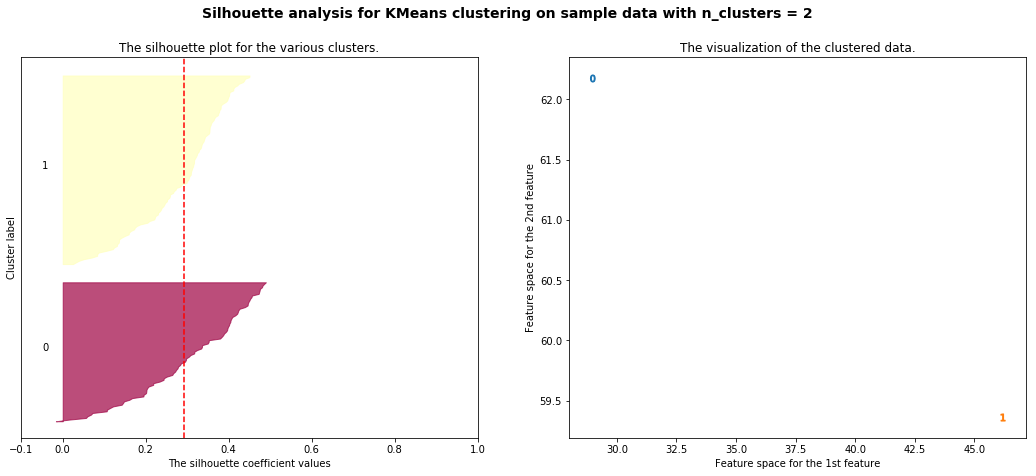

For n_clusters = 3 The average silhouette_score is : 0.38394570028610964


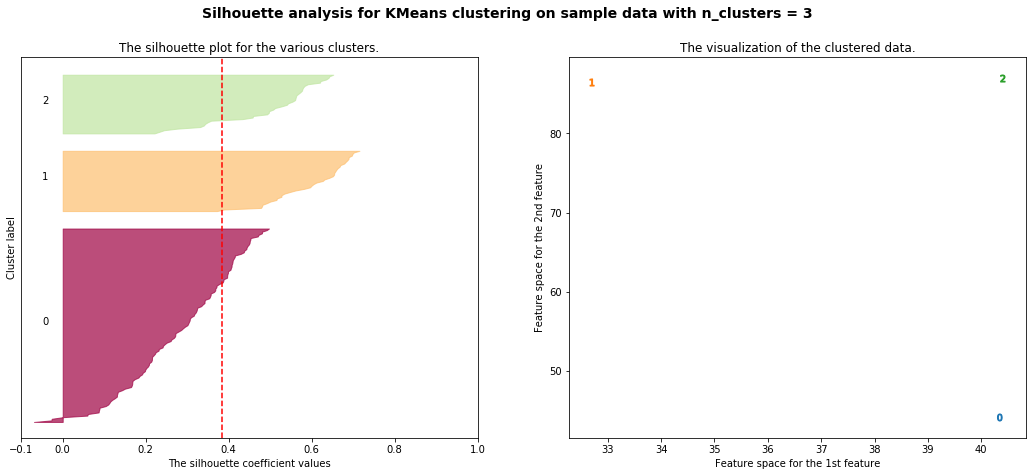

For n_clusters = 4 The average silhouette_score is : 0.40543057352939926


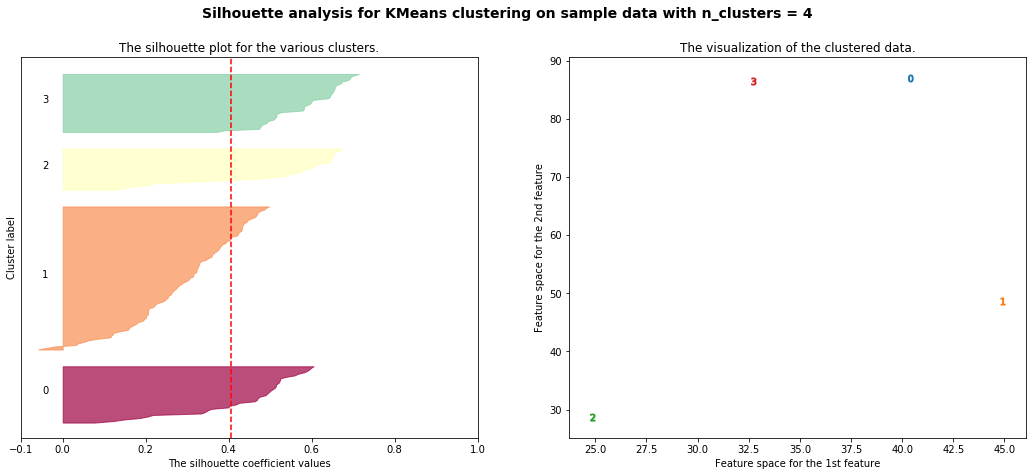

For n_clusters = 5 The average silhouette_score is : 0.4442360478081555


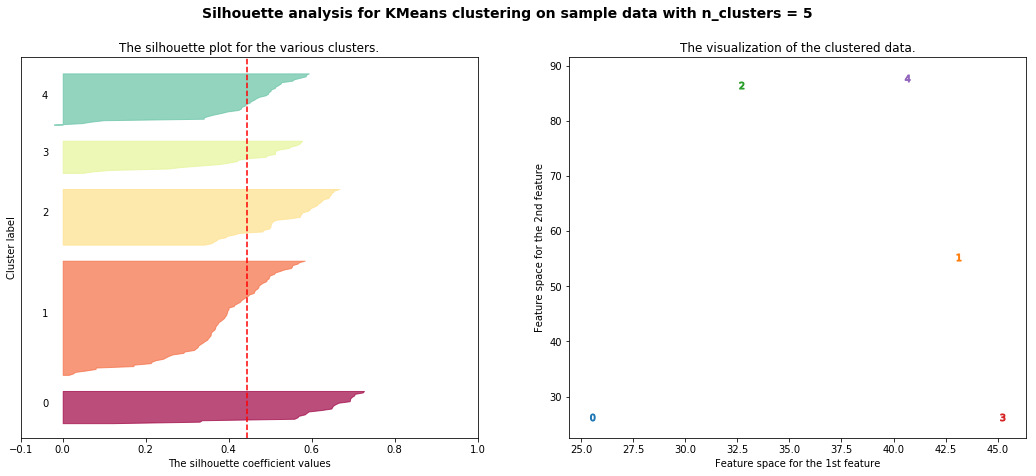

For n_clusters = 6 The average silhouette_score is : 0.45227528126773253


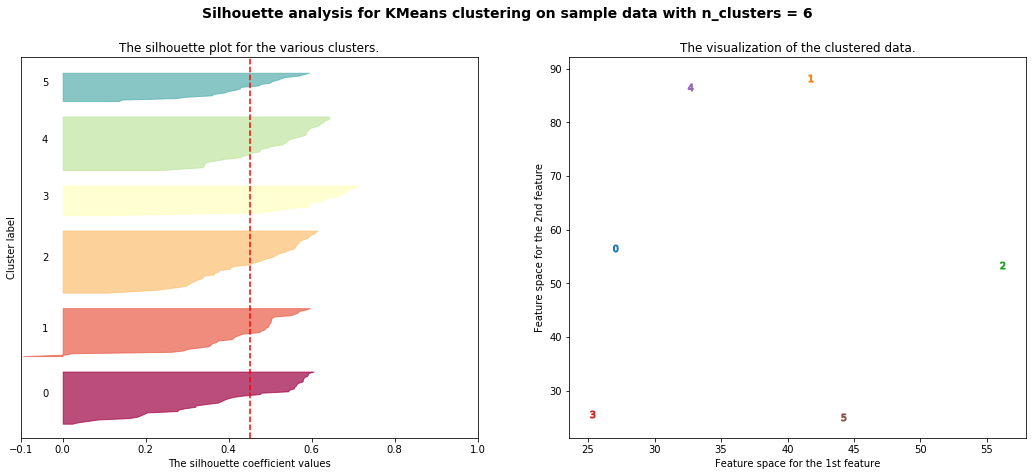

For n_clusters = 7 The average silhouette_score is : 0.4397363177101398


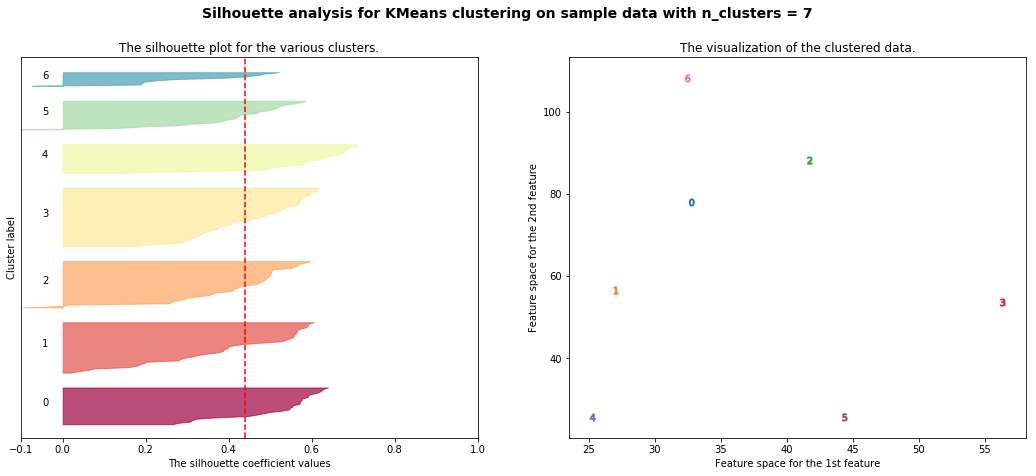

For n_clusters = 8 The average silhouette_score is : 0.43514386284007683


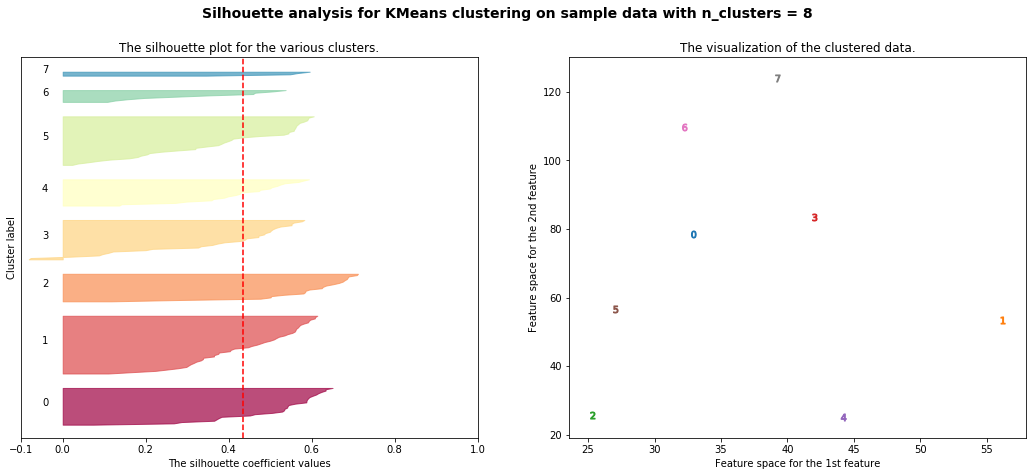

For n_clusters = 9 The average silhouette_score is : 0.40828373659505135


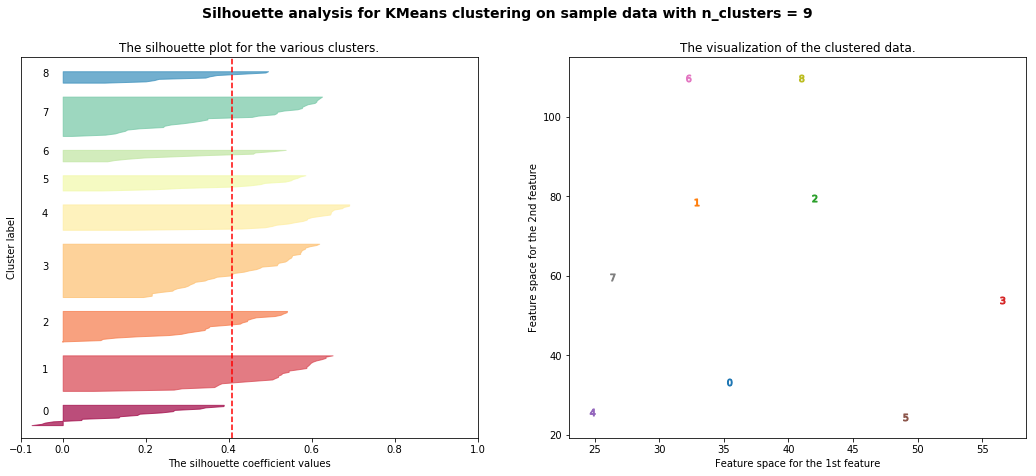

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
X = x1
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                #c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [134]:
from sklearn.metrics import silhouette_score
X = x1
for n_clusters in range(2,10):
    clusters = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.29311653710210456
For n_clusters = 3 The average silhouette_score is : 0.38394570028610964
For n_clusters = 4 The average silhouette_score is : 0.40543057352939926
For n_clusters = 5 The average silhouette_score is : 0.4442360478081555
For n_clusters = 6 The average silhouette_score is : 0.45227528126773253
For n_clusters = 7 The average silhouette_score is : 0.4397363177101398
For n_clusters = 8 The average silhouette_score is : 0.43514386284007683
For n_clusters = 9 The average silhouette_score is : 0.40828373659505135


From sihloutte analysis we came to know that the ideal no of clusters are 5 - 6 because silhoutte score for two clusters is more compared to other clusters

# For 5 clusters

In [157]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(x1)
labels = kmeans.predict(x1)

In [159]:
y1 = x1
y1["labels"] = labels

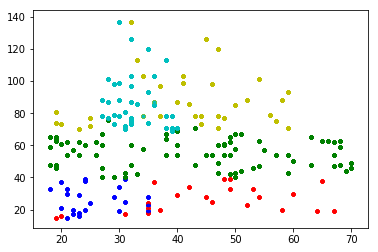

In [160]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])
for i in labels:
        points = np.array(y1.loc[y1['labels'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

# For 6 clusters

In [140]:
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(x1)
labels = kmeans.predict(x1)

In [141]:
x1["labels"] = labels

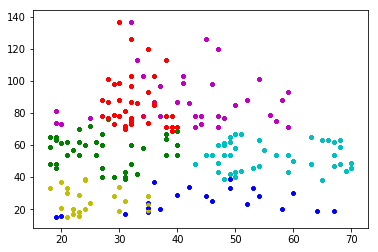

In [142]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])
for i in labels:
        points = np.array(x1.loc[x1['labels'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

# Hierarchical clustering

In [143]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  
from sklearn.cluster import AgglomerativeClustering

In [144]:
Z = linkage(x1, 'complete')
c, coph_dists = cophenet(Z , pdist(x1))
c

0.6288224383923408

In [145]:
Z = linkage(x1, 'single')
c, coph_dists = cophenet(Z , pdist(x1))
c

0.6438973377893692

In [146]:
Z = linkage(x1, 'centroid')
c, coph_dists = cophenet(Z , pdist(x1))
c

0.6837068247404515

In [147]:
Z = linkage(x1, 'average')
c, coph_dists = cophenet(Z , pdist(x1))
c

0.6893637707341361

In [148]:
Z = linkage(x1, 'ward')
c, coph_dists = cophenet(Z , pdist(x1))
c

0.6707895492399093

we got average and centroid cophenet scores as high

# Dendogram

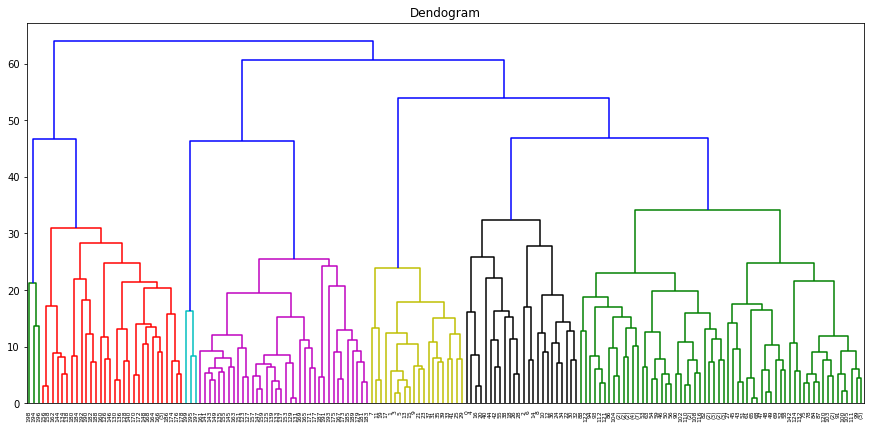

In [156]:
plt.figure(figsize=(15,7))
plt.title('Dendogram')
Z = linkage(x1, method='average')
dendrogram(Z, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=45)
plt.show()